# Clusterização

O agrupamento  é uma técnica para dividir os dados  em diferentes grupos, na qual os registros em cada grupo são semelhantes uns aos outros. Os grupos podem ser usados diretamente, analisando mais a fundo ou passados como uma característica ou resultado para um modelo de regressão ou classificação.
## Grupo de Consumidores

Vamos aprender a realizar um modelo de clusterização utilizando um case de segmentação de clientes de um shopping. Como podemos criar grupos de consumidores dado algumas caracteríticas de perfis?

## Sobre a base de dados:

Esse conjunto de dados ilustra alguns dados dos consumidores de um shopping. A base possui algumas features como: gênero, idade, renda anual e pontuação de gastos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN

# Avaliação de desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Leitura e limpeza dos dados

In [2]:
dados_path = './mall.csv'

dados = pd.read_csv(dados_path)

In [3]:
dados

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Base ok, sem valores nulos, tipos de dados corretos

# Análise exploratória

In [5]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Annual Income

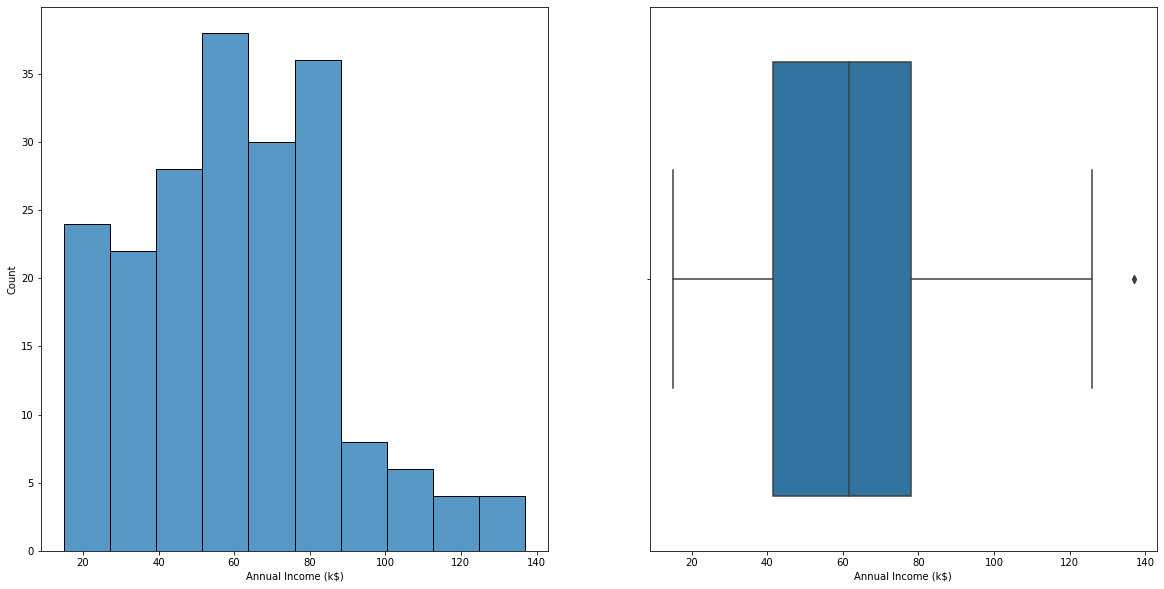

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

sns.histplot(data=dados, x='Annual Income (k$)', ax=ax[0])
sns.boxplot(data=dados, x='Annual Income (k$)', ax=ax[1])

plt.show()

## Age

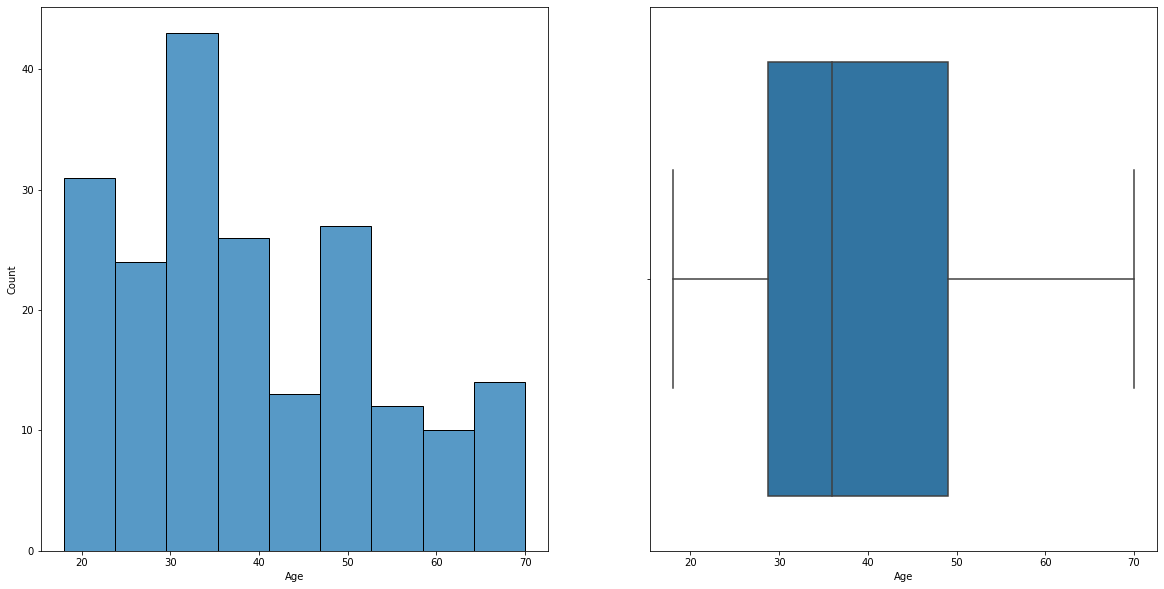

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

sns.histplot(data=dados, x='Age', ax=ax[0])
sns.boxplot(data=dados, x='Age', ax=ax[1])

plt.show()

## Spending Score

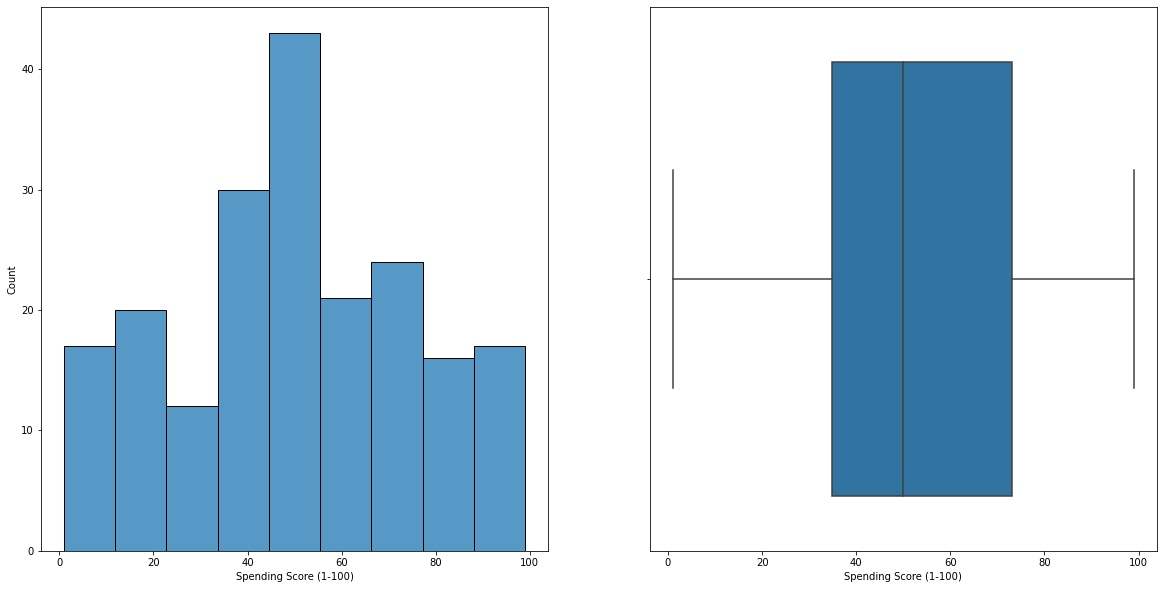

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

sns.histplot(data=dados, x='Spending Score (1-100)', ax=ax[0])
sns.boxplot(data=dados, x='Spending Score (1-100)', ax=ax[1])

plt.show()

É possível observar que todas as variáveis têm distribuição semelhante, se aproximando de uma normal

## Análise de correlação

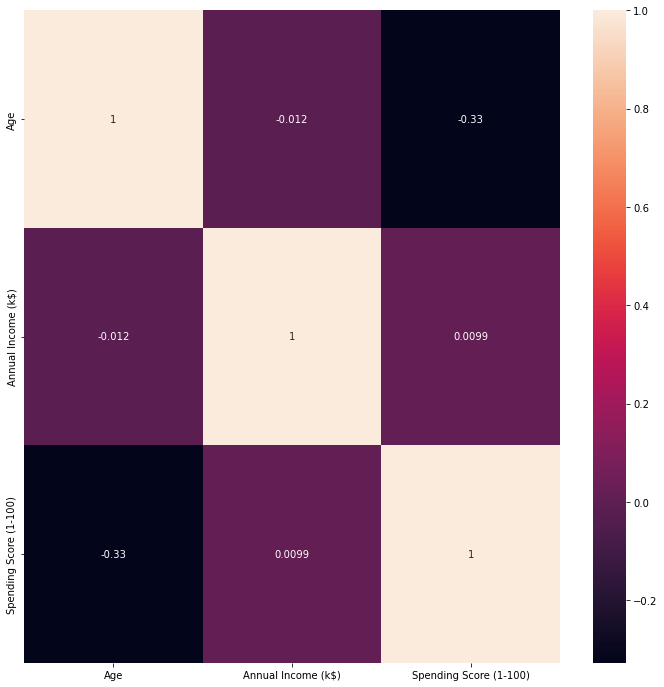

In [9]:
plt.figure(figsize=(12,12))

sns.heatmap(dados.iloc[:, 1:].corr(), annot=True)

plt.show()

## Variável gender

In [10]:
dados.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<Figure size 1080x1080 with 0 Axes>

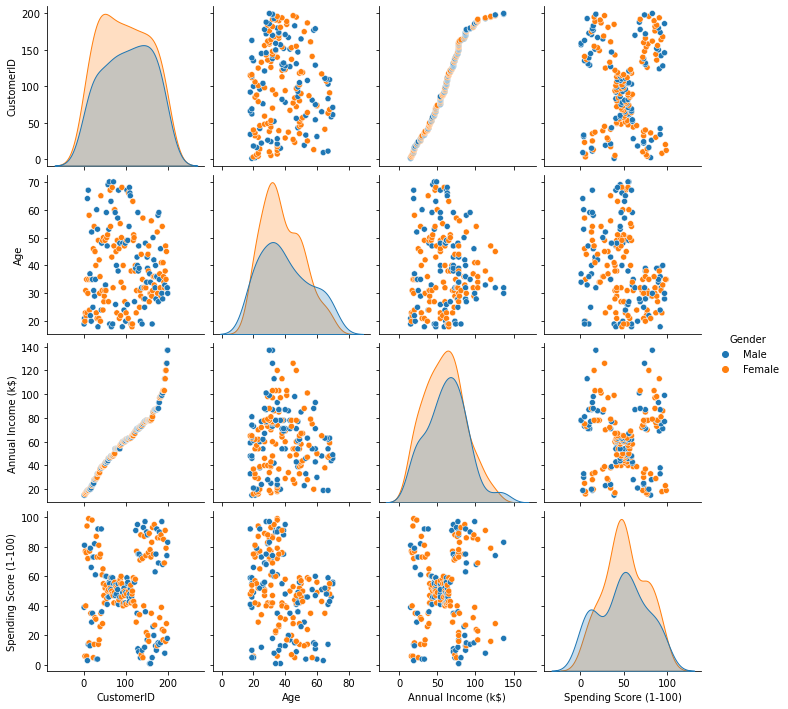

In [11]:
plt.figure(figsize=(15,15))

sns.pairplot(dados, hue='Gender')

plt.show()

Gender não parece condicionar a distribuição das variáveis, entretanto já é possível perceber alguns clusters no scatterplot Income x Spendin Score

# Feature Scaling

Há necessidade de escalonar os dados em um problema não supervisionado?

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
scaler = StandardScaler()

scaler.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

StandardScaler()

In [14]:
dados_scaled = dados.copy()

dados_scaled[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.transform(dados_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])

In [15]:
dados_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980
...,...,...,...,...,...
195,196,Female,35,2.268791,1.118061
196,197,Female,45,2.497807,-0.861839
197,198,Male,32,2.497807,0.923953
198,199,Male,32,2.917671,-1.250054


# KMeans

# Sem escalonamento

In [16]:
kmeans = KMeans(n_clusters= 6, random_state=0)

kmeans.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

centroids = kmeans.cluster_centers_

kmeans_labels = kmeans.predict(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

print(centroids)
print(kmeans_labels)

[[ 88.2         17.11428571]
 [ 55.2962963   49.51851852]
 [108.18181818  82.72727273]
 [ 25.72727273  79.36363636]
 [ 26.30434783  20.91304348]
 [ 78.03571429  81.89285714]]
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 5 0 5 1 5 0 5 0 5 1 5 0 5 0 5 0 5 0 5 1 5 0 5 0 5
 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [17]:
dados['labels'] = kmeans_labels
dados

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [18]:
print(dados.labels.value_counts())

1    81
0    35
5    28
4    23
3    22
2    11
Name: labels, dtype: int64


## Com escalonamento

In [19]:
kmeans_scaled = KMeans(n_clusters= 6, random_state=0)

kmeans_scaled.fit(dados_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])

centroids_scaled = kmeans_scaled.cluster_centers_

kmeans_labels_scaled = kmeans_scaled.predict(dados_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])

print(centroids_scaled)
print(kmeans_labels_scaled)

[[-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [ 0.68673384  1.241219  ]
 [-1.30751869 -1.13696536]
 [-0.20091257 -0.02645617]
 [ 1.87564575  1.23452563]]
[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 5 1 5 1
 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5]


In [20]:
dados_scaled['labels'] = kmeans_labels_scaled
dados_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,-1.738999,-0.434801,3
1,2,Male,21,-1.738999,1.195704,0
2,3,Female,20,-1.700830,-1.715913,3
3,4,Female,23,-1.700830,1.040418,0
4,5,Female,31,-1.662660,-0.395980,3
...,...,...,...,...,...,...
195,196,Female,35,2.268791,1.118061,5
196,197,Female,45,2.497807,-0.861839,1
197,198,Male,32,2.497807,0.923953,5
198,199,Male,32,2.917671,-1.250054,1


In [21]:
print(dados_scaled.labels.value_counts())

4    81
1    35
2    29
3    23
0    22
5    10
Name: labels, dtype: int64


# Visualização dos clusters

## Sem escalonamento

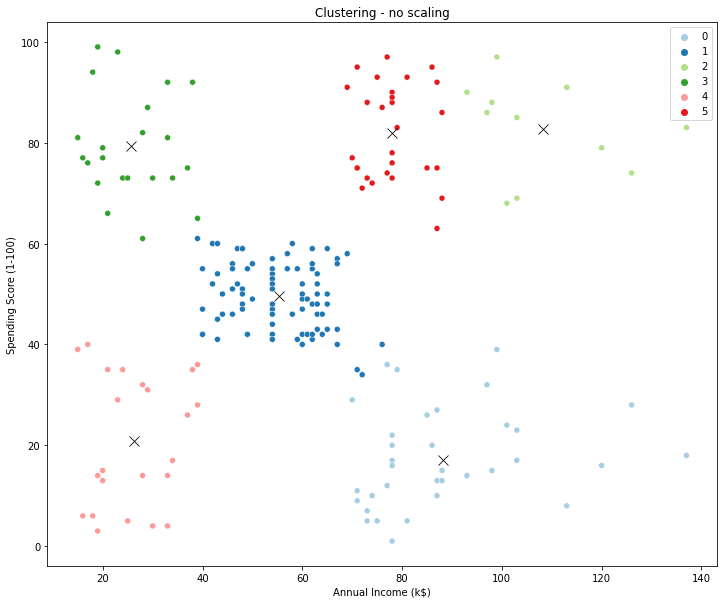

In [22]:
plt.figure(figsize=(12,10))

ax = sns.scatterplot(data=dados, x='Annual Income (k$)', y='Spending Score (1-100)', hue='labels', palette='Paired')
sns.scatterplot(x=centroids[:, 0], y=centroids[:,1], ax=ax, color='black', marker='x', s=100)

ax.set_title('Clustering - no scaling')

plt.show()

In [38]:
print(dados.groupby('labels')['Age'].mean())
print(dados.groupby('labels')['Annual Income (k$)'].mean())
print(dados.groupby('labels')['Spending Score (1-100)'].mean())

labels
0    41.114286
1    42.716049
2    32.454545
3    25.272727
4    45.217391
5    32.785714
Name: Age, dtype: float64
labels
0     88.200000
1     55.296296
2    108.181818
3     25.727273
4     26.304348
5     78.035714
Name: Annual Income (k$), dtype: float64
labels
0    17.114286
1    49.518519
2    82.727273
3    79.363636
4    20.913043
5    81.892857
Name: Spending Score (1-100), dtype: float64


## Com escalonamento

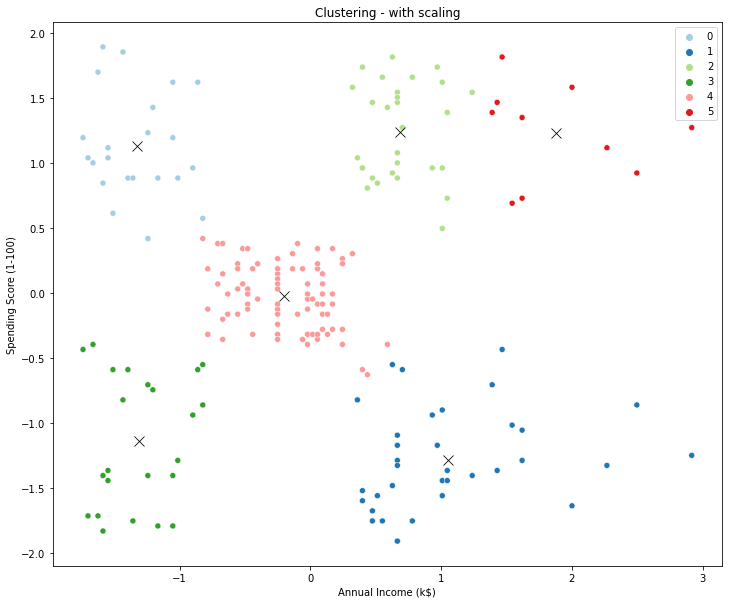

In [23]:
plt.figure(figsize=(12,10))

ax = sns.scatterplot(data=dados_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='labels', palette='Paired')
sns.scatterplot(x=centroids_scaled[:, 0], y=centroids_scaled[:,1], ax=ax, color='black', marker='x', s=100)

ax.set_title('Clustering - with scaling')

plt.show()

# Elbow method: definindo k ideal

In [25]:
k = list(range(1, 10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


c:\Users\Jackson Simionato\.conda\envs\gis\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


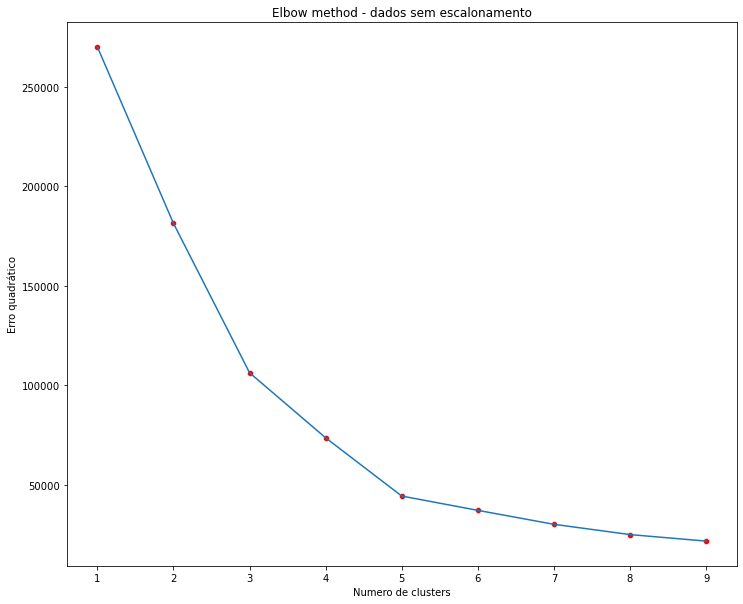

In [33]:
# Soma dos Erros Quadráticos - dados sem escalonamento
sse = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12, 10))

ax = sns.lineplot(x=k, y=sse)
sns.scatterplot(x=k, y=sse, c='red', ax=ax)

ax.set_title('Elbow method - dados sem escalonamento')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('Erro quadrático')

plt.show()

c:\Users\Jackson Simionato\.conda\envs\gis\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


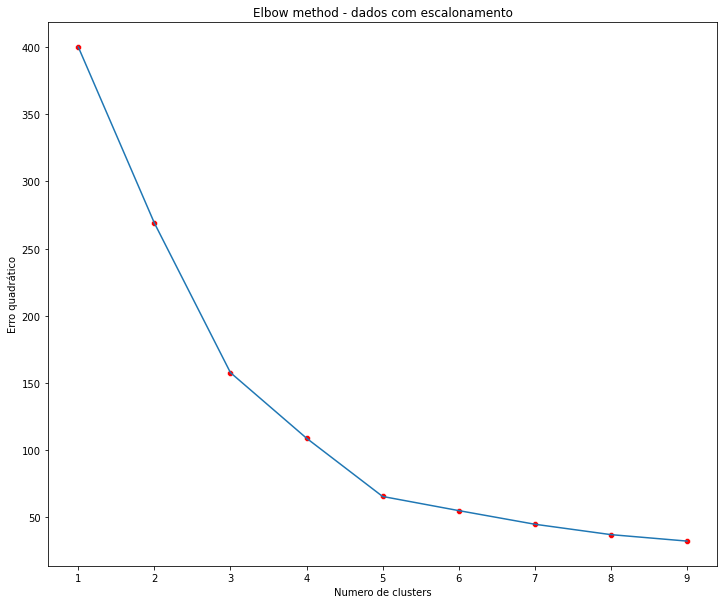

In [34]:
# Soma dos Erros Quadráticos - dados com escalonamento
sse = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12, 10))

ax = sns.lineplot(x=k, y=sse)
sns.scatterplot(x=k, y=sse, c='red', ax=ax)

ax.set_title('Elbow method - dados com escalonamento')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('Erro quadrático')

plt.show()

Para os dois casos, k=5 parece o número de clusters mais apropriado, melhor relação entre erro e número de clusters.

# Clusterização com k ideal

## Sem escalonamento

In [42]:
kmeans = KMeans(n_clusters= 5, random_state=0)

kmeans.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

centroids = kmeans.cluster_centers_

kmeans_labels = kmeans.predict(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

dados['labels'] = kmeans_labels

print(centroids)
print(kmeans_labels)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


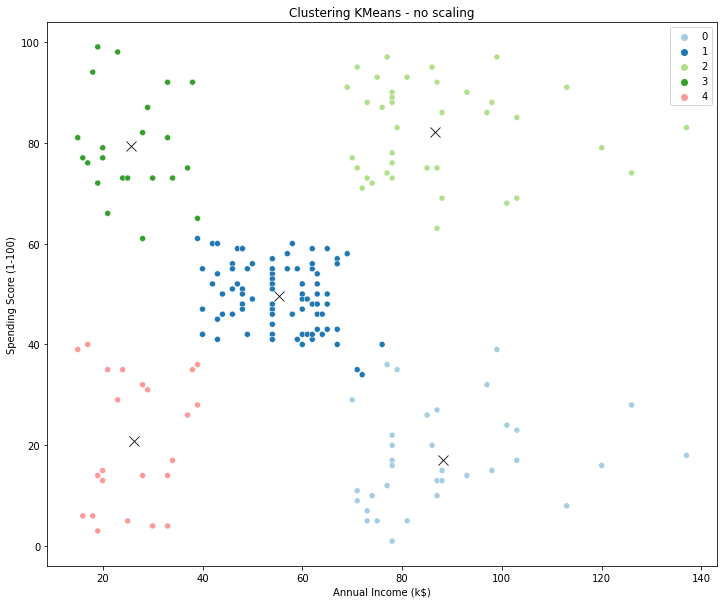

In [52]:
plt.figure(figsize=(12,10))

ax = sns.scatterplot(data=dados, x='Annual Income (k$)', y='Spending Score (1-100)', hue='labels', palette='Paired')
sns.scatterplot(x=centroids[:, 0], y=centroids[:,1], ax=ax, color='black', marker='x', s=100)

ax.set_title('Clustering KMeans - no scaling')

plt.show()

## Com escalonamento

In [46]:
kmeans_scaled = KMeans(n_clusters= 5, random_state=0)

kmeans_scaled.fit(dados_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])

centroids_scaled = kmeans_scaled.cluster_centers_

kmeans_labels_scaled = kmeans_scaled.predict(dados_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])

dados_scaled['labels'] = kmeans_labels_scaled

print(centroids_scaled)
print(kmeans_labels_scaled)

[[ 1.05500302 -1.28443907]
 [-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [-1.30751869 -1.13696536]]
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


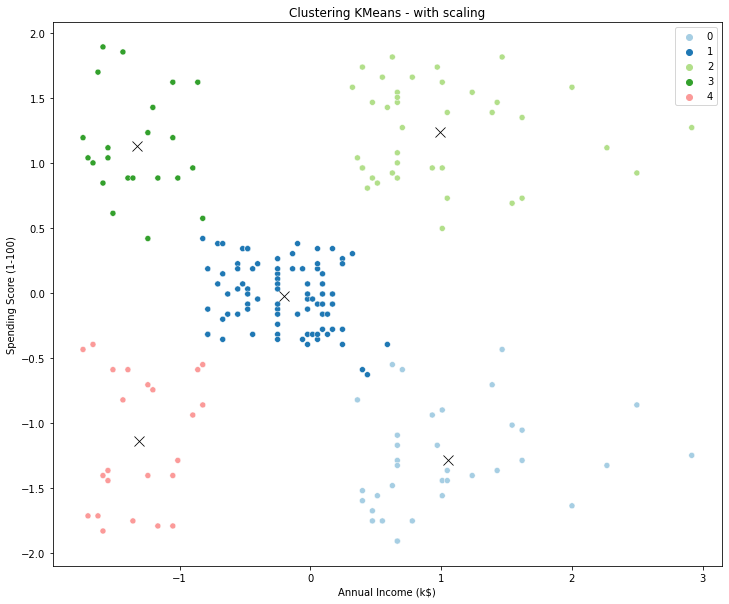

In [51]:
plt.figure(figsize=(12,10))

ax = sns.scatterplot(data=dados_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='labels', palette='Paired')
sns.scatterplot(x=centroids_scaled[:, 0], y=centroids_scaled[:,1], ax=ax, color='black', marker='x', s=100)

ax.set_title('Clustering KMeans - with scaling')

plt.show()

# DBSCAN

In [70]:
dbscan = DBSCAN(eps=10, min_samples=8)

dbscan.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
print(dbscan_labels)

dados['labels_dbscan'] = dbscan_labels

[-1  0  1  0 -1  0  1 -1  1  0 -1 -1 -1  0  1  0 -1  0 -1 -1 -1  0  1  0
  1  0 -1 -1  2  0  1  0  1 -1 -1  0 -1  0  2 -1  2 -1  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  2  3  2  3  4  3  4  3  2  3  4  3  4  3  4  3  4  3  2  3
  4  3  2  3  4  3  4  3  4  3  4  3  4  3  4  3  2  3  4  3  4  3  4  3
  4 -1  4  3  4  3  4  3  4  3  4  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


Labels -1 -> outliers

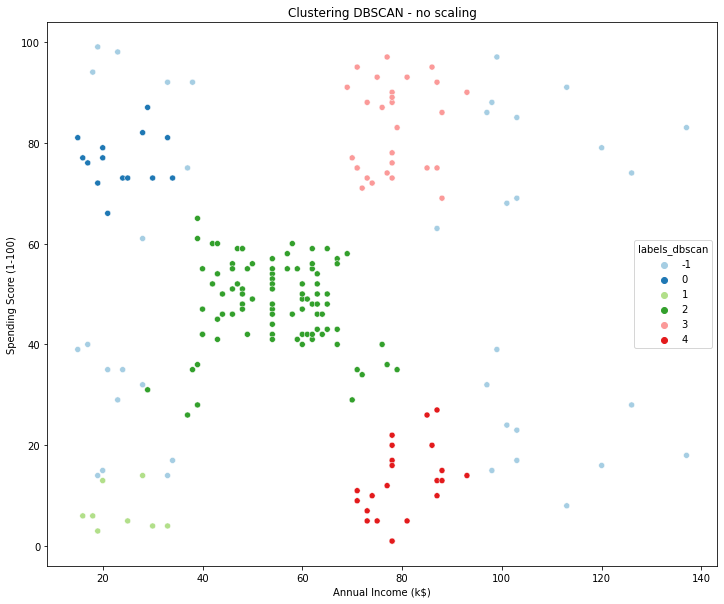

In [71]:
plt.figure(figsize=(12,10))

ax = sns.scatterplot(data=dados, x='Annual Income (k$)', y='Spending Score (1-100)', hue='labels_dbscan', palette='Paired')
#sns.scatterplot(x=centroids[:, 0], y=centroids[:,1], ax=ax, color='black', marker='x', s=100)

ax.set_title('Clustering DBSCAN - no scaling')

plt.show()

In [72]:
dados.labels_dbscan.value_counts()

 2    90
-1    38
 3    28
 4    22
 0    14
 1     8
Name: labels_dbscan, dtype: int64

# Validação de clusterização

Interna: quão bom foi o agrupamento?

Externa: quão parecido estão os resultados dos dois algoritmos de clusterização?

## Externa

In [73]:
adjusted_rand_score(kmeans_labels, dbscan_labels)

0.7151933782093212

Clusterizações estão semelhantes em ~70%

## Interna

(b) Avaliando a métrica de **Silhouette**

Mede o formato do cluster obtido: avalia a distância entre os centros dos clusters, nesse caso, queremos maximizar as distâncias)

Valores próximos a -1, significa clusters ruins, próximo a 1, clusters bem separados.

### KMeans

In [75]:
silhouette_score(dados[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans_labels)

0.553931997444648

### DBSCAN

In [76]:
silhouette_score(dados[['Annual Income (k$)', 'Spending Score (1-100)']], dbscan_labels)

0.36328873885121793